In [47]:
import win32com.client
import glob
import sys, io
import pandas as pd
import re
import os
import base64
from datetime import datetime,date
import pywintypes
import time
import seaborn as sns 

path = r"C:\Users\ngoh\Documents\test_sheet2.xlsx"
eps = 1e7

In [2]:
def getChartDict(inpath,sheetnumber): ##returns Dict with Chart Numbers and Names
    out = {}
    o = win32com.client.Dispatch('Excel.Application')
    o.Visible = True
    o.DisplayAlerts = False
        
    wb = o.Workbooks.Open(inpath)
    sheet = o.Sheets(sheetnumber)
    
    for chart in sheet.ChartObjects():
        out.update({int(re.search(r'\d+', chart.Name).group()): chart.Chart.ChartTitle.Text}) 
        
    return out
        
# ChartDict = getChartDict(path,1)
# chartlist = ['ICE JKM vs TTF',
#             'ICE TTF vs HH',
#              'ICE NBP vs TTF'    
#             ]

def getPNGs(inpath,sheetnumber,chartlist): ##rather hacky way of selection charts not by chart number but by sorted position
    o = win32com.client.Dispatch('Excel.Application')
    o.Visible = True
    o.DisplayAlerts = False
    

    saved_paths = []
    
    wb = o.Workbooks.Open(inpath)
    sheet = o.Sheets(sheetnumber)
    
    for chart_title in chartlist:   
        i=0
        for _,value in ChartDict.items(): 
            i+=1
            if chart_title == value: 
                sheet.ChartObjects(i).Chart.Export(FileName:=chart_title+".png", FilterName:="PNG")
                saved_paths.append(os.getcwd() + "/Documents/" +chart_title+ ".png")
    
    
    return saved_paths

def update_and_refresh_date_today(inpath,sheetnumber,datecellnumber,flagcellnumber):## where cell number is a tuple
    o = win32com.client.Dispatch('Excel.Application')
#     o = win32com.client.gencache.EnsureDispatch('Excel.Application')
    o.Visible = True
    o.DisplayAlerts = False

    
    wb = o.Workbooks.Open(inpath)
    sheet = o.Sheets(sheetnumber)
    today_datetime = datetime.now()
    today_datetime = datetime(today_datetime.year,today_datetime.month,today_datetime.day,0,0,0)
    today_time = time.mktime(today_datetime.timetuple())
    new_datetime = pywintypes.Time(today_time)

    sheet.Cells(datecellnumber[0], datecellnumber[1]).Value =  new_datetime

#     o.Calculation = -4105 ##set to automatic for while loop

    o.Calculate()
    while True:
#         if o.CalculationState == 0: ##check if data update is still being carried
        time.sleep(5)
        if "ZE_PROFILE()" in sheet.Cells(flagcellnumber[0], flagcellnumber[1]).Value:  
            print('Update Done!')
#             o.Calculation = -4135 ##set back to manual
            break 
    
#     wb.Save()
#     wb.Close()
#     o.Quit()
    
def update_and_refresh_date(inpath,sheetnumber,datecellnumber,flagcellnumber,newdate):## where cell number is a tuple, newdate is in "DD-MM-YYYY" format
    o = win32com.client.Dispatch('Excel.Application')
#     o = win32com.client.gencache.EnsureDispatch('Excel.Application')
    o.Visible = True
    o.DisplayAlerts = False
    

    wb = o.Workbooks.Open(inpath)
    sheet = o.Sheets(sheetnumber)
    dd,mm,yyyy = int(newdate[:2]) , int(newdate[3:5]), int(newdate[6:])
    today_datetime = datetime(yyyy,mm,dd,0,0,0)
    today_time = time.mktime(today_datetime.timetuple())
    new_datetime = pywintypes.Time(today_time)

    sheet.Cells(datecellnumber[0], datecellnumber[1]).Value =  new_datetime

#     o.Calculation = -4105 ##set to automatic for while loop
    sheet.Calculate()
    
    i=0
    while True:
#         if o.CalculationState == 0: ##check if data update is still being carried
        
        i+=1
        if i==eps:
            sheet.Calculate()
            i=0
 
        if "ZE_PROFILE()" in sheet.Cells(flagcellnumber[0], flagcellnumber[1]).Value:  
            print('Update Done!')
#             o.Calculation = -4135 ##set back to manual
            break 
    
#     wb.Save()
#     wb.Close()
#     o.Quit()
        
            
# def table_col_find(): ##finds a particular string
# def table_row_find():
def send_email(subject, text, list_img_paths):

    outlook = win32com.client.Dispatch('outlook.application')
    myItem = outlook.CreateItem(0)

    myItem.Subject = subject
    list_email_img = []
    img_tag = ''
    for i in range(len(list_img_paths)):
        list_email_img.append(base64.b64encode(open(list_img_paths[i], 'rb').read()).decode('utf-8').replace('\n',''))
        img_tag +='<img alt="" src="data:image/png;base64,{}"/>'.format(list_email_img[i])
    myItem.HtmlBody = """\
    <html>
    <head>{}</head>
    <body>
    <p>{}<br>
    </p>
    </body>
    </html>
    """.format(text, img_tag)
    myItem.To = "nicholas.goh@pavilionenergy.com"
#     myItem.CC = 'example@example.org'
    myItem.Display()
    myItem.Send()    
    
    
def take_table(inpath,sheetnumber,datecellnumber,flagcellnumber,newdate)
     
    
    
    
# saved_paths = getPNGs(path,1,chartlist)
    

In [3]:
update_and_refresh_date(path,3,(2,2),(4,1),"16-02-2021")
update_and_refresh_date(path,4,(2,2),(4,1),"16-02-2021")
ChartDict = getChartDict(path,1)
chartlist = ['ICE JKM vs TTF',
            'ICE TTF vs HH',
             'ICE NBP vs TTF'    
            ]
saved_paths = getPNGs(path,1,chartlist)
send_email("combined test", "This is a random test", saved_paths)

<ipython-input-2-beed198f3c3f>:86: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  new_datetime = pywintypes.Time(today_time)


Update Done!
Update Done!


In [11]:
send_email("combined test", "This is a random test", saved_paths)

In [33]:
o = win32com.client.Dispatch('Excel.Application')
o.Visible = True
o.DisplayAlerts = False

wb = o.Workbooks.Open(path)
sheet = o.Sheets(3)
o.calculate


# datetime.strptime(sheet.Cells(2, 2).Value, '%Y-%m-%d %H:%M:%S')


datetime.datetime(2021, 2, 5, 0, 0, tzinfo=TimeZoneInfo('GMT Standard Time', True))

In [5]:
update_and_refresh_date_today(path,3,(2,2),(4,1))

# today_datetime = pywintypes.Time(date.today)


<ipython-input-4-025bb3772b9c>:51: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  new_datetime = pywintypes.Time(today_time)


Update Done!


com_error: (-2147352567, 'Exception occurred.', (0, 'Microsoft Excel', 'Unable to set the Calculation property of the Application class', 'xlmain11.chm', 0, -2146827284), None)

In [43]:
update_and_refresh_date(path,3,(2,2),(4,1),"17-02-2021")



<ipython-input-42-020f497110f6>:100: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  new_datetime = pywintypes.Time(today_time)


Update Done!


In [4]:
o = win32com.client.Dispatch('Excel.Application')
o.Visible = True
o.DisplayAlerts = False
path = r"C:\Users\ngoh\Documents\curves_test.xlsm"

wb = o.Workbooks.Open(path)
sheet = o.Sheets(12)

<AxesSubplot:>

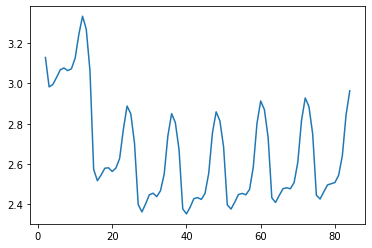

In [49]:
df = pd.DataFrame(sheet.Range("AA3:AI87").Value )
df.columns = df.iloc[0]
df = df.iloc[2:]
df['Month'] = df['Month'].apply(lambda x: str(x)[:-6])

# df=df.set_index('Month')
df=df.replace(" ",0) 
df
df['HH'].plot.line()

In [ ]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
from BSM_option_valuation import BSM_call_value
#
# Model Parameters
#
S0 = 100.0 # index level
K = 100.0 # option strike
T = 1.0 # maturity date
r = 0.05 # risk-less short rate
sigma = 0.2 # volatility

def CRR_option_value(S0, K, T, r, sigma, otype, M=4):
''' Cox-Ross-Rubinstein European option valuation.
    Parameters
    ==========
    S0: float
    stock/index level at time 0
    K: float
    strike price
    T: float
    date of maturity
    r: float
    constant, risk-less short rate
    sigma: float
    volatility
    otype: string
    either 'call' or 'put'
    M: int
    number of time intervals
    '''
    # Time Parameters
    dt = T / M # length of time interval
    df = math.exp(-r * dt) # discount per interval
    # Binomial Parameters
    u = math.exp(sigma * math.sqrt(dt)) # up movement
    d = 1 / u # down movement
    q = (math.exp(r * dt) - d) / (u - d) # martingale branch probability
    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md
    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0) # inner values for European call option
    else:
        V = np.maximum(K - S, 0) # inner values for European put option
    z = 0
    for t in range(M - 1, -1, -1): # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1]+ (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    return V[0, 0]

def plot_convergence(mmin, mmax, step_size):
''' Plots the CRR option values for increasing number of time
intervals M against the Black-Scholes-Merton benchmark value.'''
    BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
    m = xrange(mmin, mmax, step_size)
    CRR_values = [CRR_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    plt.figure(figsize=(9, 5))
    plt.plot(m, CRR_values, label='CRR values')
    plt.axhline(BSM_benchmark, color='r', ls='dashed', lw=1.5,
    label='BSM benchmark')
    plt.grid()
    plt.xlabel('# of binomial steps $M$')
    plt.ylabel('European call option value')
    plt.legend(loc=4)
    plt.xlim(0, mmax)

<AxesSubplot:xlabel='Month', ylabel='HH'>

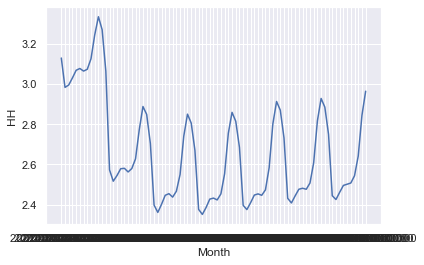

In [52]:
sns.set_theme()
sns.lineplot(data=df,x='Month',y='HH')